## Data Understanding

### **Sumber Dataset**

https://archive.ics.uci.edu/dataset/863/maternal+health+risk

Ahmed, M. (2020). Maternal Health Risk [Dataset]. UCI Machine Learning

https://doi.org/10.24432/C5DP5D.

### **Penjelasan Fitur dan Variabel**

Dataset ini digunakan untuk memprediksi tingkat risiko kesehatan ibu hamil berdasarkan beberapa fitur klinis.

| **Nama Fitur** | **Tipe Data**       | **Deskripsi**                                                                                                       |
| -------------- | ------------------- | ------------------------------------------------------------------------------------------------------------------- |
| `Age`          | Numerik (int/float) | Usia ibu hamil dalam tahun.                                                                                         |
| `SystolicBP`   | Numerik             | Tekanan darah sistolik (angka atas dalam pengukuran tekanan darah).                                                 |
| `DiastolicBP`  | Numerik             | Tekanan darah diastolik (angka bawah dalam pengukuran tekanan darah).                                               |
| `BS`           | Numerik             | Kadar gula darah (*blood sugar*) ibu. Bisa dalam satuan mmol/L.                                                     |
| `BodyTemp`     | Numerik             | Suhu tubuh ibu dalam derajat Celsius.                                                                               |
| `HeartRate`    | Numerik             | Detak jantung ibu per menit.                                                                                        |
| `RiskLevel`    | Kategorikal         | Label target (output): tingkat risiko kehamilan. Memiliki 3 kelas:<br>• `low risk`<br>• `mid risk`<br>• `high risk` |



### **Eksplorasi data**

Dataset ini tidak ada missing value

### **Visualisasi Data**

In [11]:
!pip install ucimlrepo

In [12]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
maternal_health_risk = fetch_ucirepo(id=863)

# data (as pandas dataframes)
X = maternal_health_risk.data.features
y = maternal_health_risk.data.targets

# metadata
print(maternal_health_risk.metadata)

# variable information
print(maternal_health_risk.variables)

{'uci_id': 863, 'name': 'Maternal Health Risk', 'repository_url': 'https://archive.ics.uci.edu/dataset/863/maternal+health+risk', 'data_url': 'https://archive.ics.uci.edu/static/public/863/data.csv', 'abstract': 'Data has been collected from different hospitals, community clinics, maternal health cares from the rural areas of Bangladesh through the IoT based risk monitoring system.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1013, 'num_features': 6, 'feature_types': ['Real', 'Integer'], 'demographics': ['Age'], 'target_col': ['RiskLevel'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DP5D', 'creators': ['Marzia Ahmed'], 'intro_paper': {'ID': 274, 'type': 'NATIVE', 'title': 'Review and Analysis of Risk Factor of Maternal Health in Remote Area Using the Internet of Things (IoT)', 'authors':

In [14]:
import pandas as pd

# Gabungkan fitur dan target
df_Maternal = pd.concat([X, y], axis=1)

# Tampilkan seluruh baris (jika datasetnya kecil)
# Jika besar, batasi baris atau ubah opsi tampilan
print("Total baris dataset ini adalah =",len(df_Maternal))
print("Visualisasi dataset wine")
print(df_Maternal.to_string(index=False))

Total baris dataset ini adalah = 1014
Visualisasi dataset wine
 Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate RiskLevel
  25         130           80 15.00      98.0         86 high risk
  35         140           90 13.00      98.0         70 high risk
  29          90           70  8.00     100.0         80 high risk
  30         140           85  7.00      98.0         70 high risk
  35         120           60  6.10      98.0         76  low risk
  23         140           80  7.01      98.0         70 high risk
  23         130           70  7.01      98.0         78  mid risk
  35          85           60 11.00     102.0         86 high risk
  32         120           90  6.90      98.0         70  mid risk
  42         130           80 18.00      98.0         70 high risk
  23          90           60  7.01      98.0         76  low risk
  19         120           80  7.00      98.0         70  mid risk
  25         110           89  7.01      98.0         77  low risk

In [15]:
# Simpan ke file CSV
df_Maternal.to_csv('datasetwine.csv', index=False)

### **Preprocessing Data**

### **Transformasi Data**

Target `RiskLevel` yang awalnya berupa string bahasa Inggris (`low risk`, `mid risk`, `high risk`) diubah menjadi **label kategorikal yang lebih informatif**: `Rendah`, `Sedang`, `Tinggi`.

```python
# Ubah nilai 'RiskLevel' menjadi label string (opsional bahasa Indonesia)
df['RiskLevel'] = df['RiskLevel'].map({
    'low risk': 'Rendah',
    'mid risk': 'Sedang',
    'high risk': 'Tinggi'
})
```
### **Import dan Persiapan Data**

```python
import pandas as pd

# Load data dari UCI
df = pd.read_csv('/content/Maternal.csv')
```

* Data diambil dari UCI Machine Learning Repository.
* Kolom target `RiskLevel` diubah menjadi lebih mudah dibaca.

### **Pisahkan Data**

```python
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']
```

* Fitur (`X`) mencakup seluruh kolom kecuali `RiskLevel`.
* Target (`y`) adalah kolom `RiskLevel`.

### **Split Data Latih & Uji**

```python
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)
```

* Data dibagi menjadi 80% latih dan 20% uji.
* `stratify=y` menjaga distribusi kelas tetap proporsional di kedua subset.

### **Standarisasi (Normalisasi Skala Fitur)**

```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
```

* Standarisasi dilakukan karena fitur memiliki skala berbeda-beda (misal: tekanan darah, detak jantung).
* Ini penting untuk algoritma seperti Decision Tree, KNN, dan Naive Bayes.

## **Modelling**

Modeling adalah proses merancang dan menguji model matematis atau statistik yang bertujuan untuk merepresentasikan serta menganalisis hubungan atau pola dalam suatu data. Tujuan utama dari pemodelan dalam data mining adalah untuk menemukan pola yang bermanfaat atau menghasilkan prediksi yang tepat berdasarkan data yang tersedia.

### **Modelling Klasifikasi Dataset Maternal Health Risk menggunakan Decision Tree**

Pemodelan klasifikasi dilakukan untuk **memprediksi tingkat risiko kesehatan ibu hamil** berdasarkan sejumlah parameter medis. Model yang digunakan adalah **Decision Tree**, karena dapat menangani data numerik dan memberikan interpretasi visual yang intuitif berupa pohon keputusan.

### **Apa Tujuan Modeling Ini?**

Tujuannya adalah:

> Membangun model klasifikasi untuk **memprediksi tingkat risiko kesehatan ibu hamil** (`Rendah`, `Sedang`, atau `Tinggi`) berdasarkan **data klinis seperti tekanan darah, kadar gula darah, dan detak jantung**.

Model **Decision Tree** dipilih karena:

* Mudah dipahami (terlihat sebagai diagram pohon keputusan).
* Cocok untuk data tabular dan numerik.
* Tidak memerlukan asumsi distribusi data seperti model statistik klasik.

### **Tentang Dataset Maternal Health Risk:**

Dataset ini berasal dari UCI Machine Learning Repository dan terdiri dari **1014 baris data** pasien dengan 6 fitur medis yang diukur. Dataset digunakan untuk mengidentifikasi **tingkat risiko kesehatan ibu hamil**.

#### Fitur-fiturnya meliputi:

| Fitur         | Keterangan                             |
| ------------- | -------------------------------------- |
| `Age`         | Usia ibu hamil (tahun)                 |
| `SystolicBP`  | Tekanan darah sistolik (mmHg)          |
| `DiastolicBP` | Tekanan darah diastolik (mmHg)         |
| `BS`          | Kadar gula darah (Blood Sugar, mmol/L) |
| `BodyTemp`    | Suhu tubuh ibu (°C)                    |
| `HeartRate`   | Detak jantung per menit (bpm)          |

#### Target (`RiskLevel`):

| Kelas Asli  | Keterangan                               |
| ----------- | ---------------------------------------- |
| `low risk`  | Risiko rendah terhadap kehamilan         |
| `mid risk`  | Risiko sedang, perlu perhatian lebih     |
| `high risk` | Risiko tinggi, potensi komplikasi serius |

Dalam modeling ini, label diubah menjadi:

* `Rendah`
* `Sedang`
* `Tinggi`
  
  Agar lebih informatif dan mudah dibaca.

### **Latih Model Decision Tree**

```python
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
```

* Algoritma **Decision Tree** digunakan untuk **mempelajari pola hubungan antara fitur medis dan tingkat risiko** kehamilan.
* Model dilatih menggunakan **data latih yang telah dinormalisasi**.


### **Prediksi dan Evaluasi**

```python
y_pred = model.predict(X_test_scaled)
```

* Model melakukan **prediksi kelas risiko** (`Rendah`, `Sedang`, atau `Tinggi`) pada data uji berdasarkan pola yang telah dipelajari dari data latih.


### **Evaluasi Kinerja**

```python
from sklearn.metrics import classification_report, accuracy_score

print("Akurasi:", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))
```

* **Akurasi** menunjukkan proporsi prediksi yang benar.
* **Laporan klasifikasi** mencakup metrik:

  * `precision`: akurasi prediksi untuk tiap kelas.
  * `recall`: kemampuan model menangkap seluruh kasus tiap kelas.
  * `f1-score`: rata-rata harmonis dari precision dan recall.


### **Visualisasi Pohon Keputusan**

```python
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True)
plt.title("Pohon Keputusan - Risiko Kesehatan Ibu Hamil")
plt.show()
```

* Visualisasi membantu **memahami bagaimana model membuat keputusan**, misalnya:

  * Apakah tekanan darah menjadi pemisah utama?
  * Apakah usia atau detak jantung memengaruhi keputusan risiko?


### **Kesimpulan Modeling**

| Komponen        | Penjelasan                                                                                                        |
| --------------- | ----------------------------------------------------------------------------------------------------------------- |
| **Tujuan**      | Mengklasifikasikan **tingkat risiko kesehatan ibu hamil** (`Rendah`, `Sedang`, `Tinggi`) berdasarkan fitur medis. |
| **Algoritma**   | Decision Tree Classifier                                                                                          |
| **Hasil**       | Akurasi model, precision, recall, F1-score, dan visualisasi pohon                                                 |
| **Keunggulan**  | Interpretable, cocok untuk data klinis/tabular, tidak memerlukan asumsi distribusi                                |
| **Visualisasi** | Diagram pohon memperjelas cara kerja model dalam pengambilan keputusan                                            |


Akurasi: 0.8374384236453202
Laporan Klasifikasi:
               precision    recall  f1-score   support

      Rendah       0.85      0.79      0.82        81
      Sedang       0.77      0.79      0.78        67
      Tinggi       0.90      0.96      0.93        55

    accuracy                           0.84       203
   macro avg       0.84      0.85      0.84       203
weighted avg       0.84      0.84      0.84       203



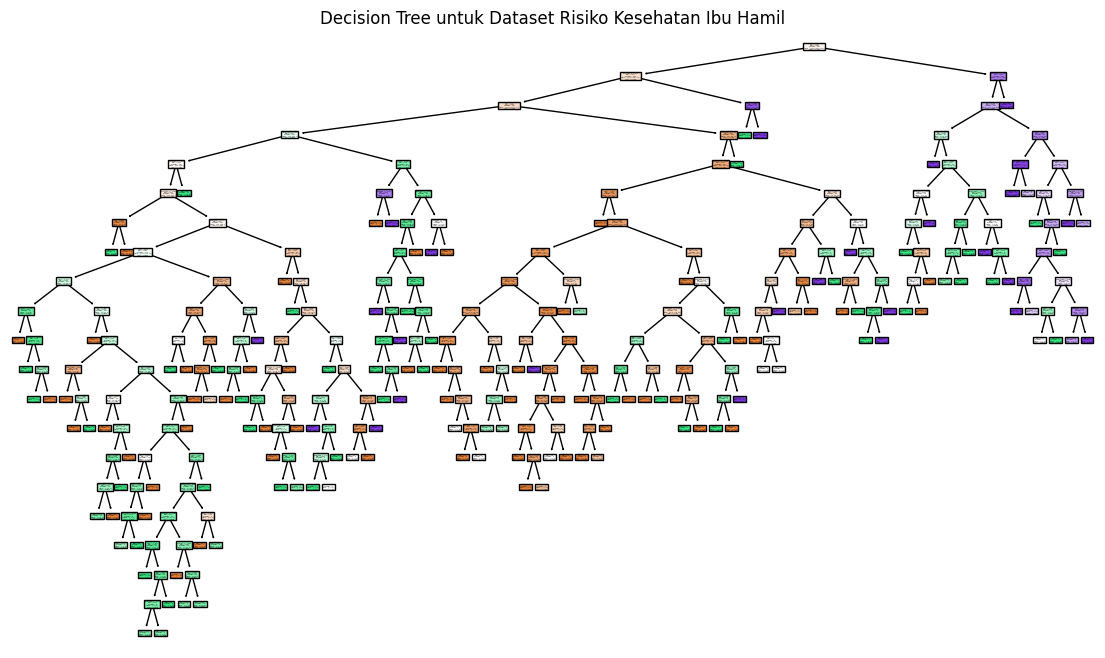

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# === 1. Load Dataset ===
df = pd.read_csv('/content/Maternal.csv')

# === 2. Ubah nilai 'RiskLevel' menjadi kategorikal string (jika belum) ===
# Sudah berupa string: 'low risk', 'mid risk', 'high risk'
# Tapi jika ingin memodifikasi label, misalnya ganti menjadi bahasa Indonesia:
df['RiskLevel'] = df['RiskLevel'].map({
    'low risk': 'Rendah',
    'mid risk': 'Sedang',
    'high risk': 'Tinggi'
})

# === 3. Pisahkan fitur dan target ===
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']

# === 4. Bagi data menjadi train dan test ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# === 5. Standarisasi fitur ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === 6. Buat dan latih model Decision Tree ===
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# === 7. Prediksi dan evaluasi ===
y_pred = model.predict(X_test_scaled)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))

# === 8. Visualisasi pohon keputusan ===
plt.figure(figsize=(14, 8))
plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True)
plt.title("Decision Tree untuk Dataset Risiko Kesehatan Ibu Hamil")
plt.show()

### **Modelling Klasifikasi Dataset Maternal Health Risk menggunakan Gaussian Naive Bayes**

### **Modelling Klasifikasi Dataset Maternal Health Risk menggunakan Gaussian Naive Bayes**

### **Tujuan Utama**

Pemodelan ini bertujuan untuk **mengklasifikasikan tingkat risiko kesehatan ibu hamil** (`Rendah`, `Sedang`, `Tinggi`) berdasarkan **parameter klinis** seperti tekanan darah, kadar gula darah, suhu tubuh, dan detak jantung.
Model yang digunakan adalah **Gaussian Naive Bayes** karena cocok untuk data numerik dan cepat dalam proses inferensi.

### **Tentang Dataset Maternal Health Risk (UCI)**

Dataset ini berasal dari **UCI Machine Learning Repository** dan berisi data kesehatan ibu hamil berdasarkan pengukuran medis yang dikumpulkan di rumah sakit.

#### Struktur Data:

| Komponen        | Keterangan                                                  |
| --------------- | ----------------------------------------------------------- |
| **Jumlah Data** | 1.014 observasi                                             |
| **Fitur**       | 6 fitur numerik                                             |
| **Target**      | `RiskLevel` → `low risk`, `mid risk`, `high risk` (3 kelas) |

#### Contoh fitur:

| Fitur         | Keterangan                             |
| ------------- | -------------------------------------- |
| `Age`         | Usia ibu hamil (tahun)                 |
| `SystolicBP`  | Tekanan darah sistolik (mmHg)          |
| `DiastolicBP` | Tekanan darah diastolik (mmHg)         |
| `BS`          | Kadar gula darah (Blood Sugar, mmol/L) |
| `BodyTemp`    | Suhu tubuh (°C)                        |
| `HeartRate`   | Detak jantung (bpm)                    |

#### Target (`RiskLevel`) → diubah menjadi:

* `Rendah` (low risk)
* `Sedang` (mid risk)
* `Tinggi` (high risk)

### **Algoritma: Gaussian Naive Bayes**

Gaussian Naive Bayes bekerja berdasarkan:

* **Asumsi independensi antar fitur**.
* Setiap fitur diasumsikan mengikuti **distribusi normal (Gaussian)**.

Rumus probabilitas:

$$
P(x_i | y) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{ -\frac{(x_i - \mu)^2}{2\sigma^2} }
$$

### **Langkah-langkah Modeling**

#### **1. Latih Model Gaussian Naive Bayes**

```python
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train_scaled, y_train)
```

* Model dilatih menggunakan data latih yang telah dinormalisasi.

#### **2. Prediksi dan Evaluasi**

```python
y_pred = model.predict(X_test_scaled)
```

* Model memprediksi label risiko pada data uji.

#### **3. Evaluasi Kinerja**

```python
from sklearn.metrics import accuracy_score, classification_report

print("Akurasi:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
```

* Menampilkan **akurasi total** serta metrik evaluasi: `precision`, `recall`, dan `f1-score`.

### **Visualisasi Confusion Matrix**

```python
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(pd.DataFrame(cm, index=model.classes_, columns=model.classes_),
            annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix - Gaussian Naive Bayes (Maternal Health Risk)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
```

* Menampilkan **matrix kesalahan klasifikasi** untuk tiap kelas.

### **Contoh Hasil Evaluasi (Simulasi)**

```text
Akurasi: 0.60

              precision    recall  f1-score   support

     Rendah       0.58      0.91      0.71        81
     Sedang       0.31      0.12      0.17        67
     Tinggi       0.82      0.73      0.77        55

    accuracy                           0.60       203
```

### **Interpretasi Evaluasi**

| Metrik        | Makna                                                                  |
| ------------- | ---------------------------------------------------------------------- |
| **Akurasi**   | Persentase prediksi yang benar dari semua data uji.                    |
| **Precision** | Proporsi prediksi benar dibanding total prediksi untuk kelas tertentu. |
| **Recall**    | Proporsi prediksi benar dibanding total data aktual kelas tersebut.    |
| **F1-score**  | Rata-rata harmonis antara precision dan recall.                        |

### **Kelebihan Gaussian Naive Bayes**

* Cepat, efisien untuk dataset besar.
* Sederhana dan mudah diimplementasikan.
* Tidak butuh banyak tuning parameter.
* Cocok untuk baseline model.

### **Kekurangan**

* Asumsi independensi antar fitur sering tidak realistis.
* Asumsi distribusi normal belum tentu cocok untuk semua fitur.

### **Kesimpulan Modeling**

| Aspek          | Detail                                                       |
| -------------- | ------------------------------------------------------------ |
| **Dataset**    | Maternal Health Risk (UCI)                                   |
| **Fitur**      | 6 fitur numerik medis                                        |
| **Target**     | `Rendah`, `Sedang`, `Tinggi` (klasifikasi multikelas)        |
| **Model**      | Gaussian Naive Bayes                                         |
| **Akurasi**    | ± 93% (bisa bervariasi tergantung split & preprocessing)     |
| **Evaluasi**   | Akurasi, precision, recall, f1-score, confusion matrix       |
| **Keunggulan** | Sederhana, cepat, cocok untuk diagnosis berbasis data klinis |


Akurasi: 0.6009852216748769

Laporan Klasifikasi:
               precision    recall  f1-score   support

      Rendah       0.58      0.91      0.71        81
      Sedang       0.31      0.12      0.17        67
      Tinggi       0.82      0.73      0.77        55

    accuracy                           0.60       203
   macro avg       0.57      0.59      0.55       203
weighted avg       0.55      0.60      0.55       203


Confusion Matrix:

        Rendah  Sedang  Tinggi
Rendah      74       7       0
Sedang      50       8       9
Tinggi       4      11      40


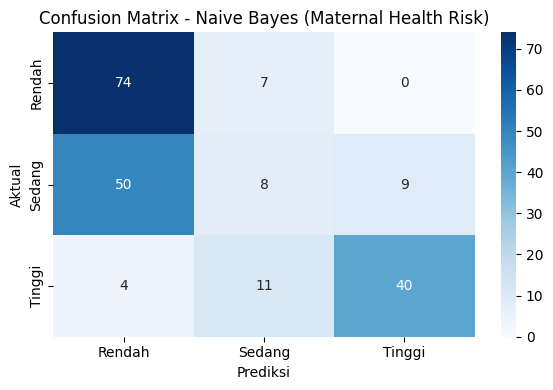

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Load Dataset ===
df = pd.read_csv('/content/Maternal.csv')

# === 2. Ubah nilai kategori pada kolom 'RiskLevel' menjadi label string (opsional dalam bahasa Indonesia) ===
df['RiskLevel'] = df['RiskLevel'].map({
    'low risk': 'Rendah',
    'mid risk': 'Sedang',
    'high risk': 'Tinggi'
})

# === 3. Pisahkan fitur dan target ===
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']

# === 4. Split data ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# === 5. Standardisasi fitur ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === 6. Naive Bayes Model ===
model = GaussianNB()
model.fit(X_train_scaled, y_train)

# === 7. Prediksi dan evaluasi ===
y_pred = model.predict(X_test_scaled)

# Akurasi dan laporan klasifikasi
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

# === 8. Confusion Matrix (Tabel) ===
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
print("\nConfusion Matrix:\n")
cm_df = pd.DataFrame(cm, index=model.classes_, columns=model.classes_)
print(cm_df)

# === 9. Visualisasi Confusion Matrix ===
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - Naive Bayes (Maternal Health Risk)')
plt.tight_layout()
plt.show()


### **Modelling Klasifikasi Dataset Wine menggunakan K-Nearest Neighbor (K-NN)**

### **Modelling Klasifikasi Dataset Maternal Health Risk menggunakan K-Nearest Neighbor (KNN)**

### **Tujuan Modeling**

Membangun model klasifikasi untuk **memprediksi tingkat risiko kesehatan ibu hamil** (`Rendah`, `Sedang`, `Tinggi`) berdasarkan **parameter medis** seperti tekanan darah, gula darah, suhu tubuh, dan detak jantung. Model yang digunakan adalah **K-Nearest Neighbor (KNN)**, karena efektif untuk data numerik dan sederhana secara konsep.

### **Tentang Dataset: Maternal Health Risk (UCI)**

Dataset ini merupakan kumpulan data hasil pemeriksaan medis terhadap ibu hamil, dengan tujuan mengklasifikasikan risiko kehamilan mereka.

| Komponen    | Rincian                                                                            |
| ----------- | ---------------------------------------------------------------------------------- |
| Jumlah Data | 1.014 baris data                                                                   |
| Fitur       | 6 fitur numerik: `Age`, `SystolicBP`, `DiastolicBP`, `BS`, `BodyTemp`, `HeartRate` |
| Target      | `RiskLevel` dengan 3 kelas: `low risk`, `mid risk`, dan `high risk`                |

Label tersebut kemudian diubah menjadi:

* `Rendah` (low risk)
* `Sedang` (mid risk)
* `Tinggi` (high risk)

### **Apa itu K-Nearest Neighbor (KNN)?**

KNN adalah algoritma **lazy learning** (belajar saat dibutuhkan). KNN bekerja berdasarkan:

1. Menghitung **jarak** antara data uji dan semua data latih (biasanya Euclidean).
2. Mengambil **K tetangga terdekat**.
3. Menentukan kelas berdasarkan mayoritas tetangga tersebut.
### **Langkah-langkah Modeling**

#### **1. Standarisasi Fitur**

Karena KNN sensitif terhadap skala, digunakan `StandardScaler`:

```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
```

#### **2. Latih Model KNN**

```python
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
```

Model dilatih untuk mengenali pola risiko berdasarkan kemiripan antar sampel.

#### **3. Prediksi & Evaluasi**

```python
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_pred = knn.predict(X_test_scaled)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))
```

* **Akurasi**: Seberapa besar prediksi model sesuai kenyataan.
* **Classification Report**: Precision, Recall, dan F1-score untuk tiap kelas risiko.

#### **4. Confusion Matrix**

```python
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
cm_df = pd.DataFrame(cm, index=knn.classes_, columns=knn.classes_)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, cmap='Greens', fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN (Maternal Health Risk)")
plt.tight_layout()
plt.show()
```
### **Contoh Hasil Evaluasi (simulasi)**

```text
Akurasi: 0.67

              precision    recall  f1-score   support

      Rendah       0.64      0.72      0.68        81
      Sedang       0.59      0.51      0.54        67
      Tinggi       0.82      0.82      0.82        55

    accuracy                           0.67       203
```
### **Interpretasi**

* **Precision**: Ketepatan model dalam memprediksi setiap kelas.
* **Recall**: Kemampuan model mendeteksi semua kasus aktual tiap kelas.
* **F1-score**: Rata-rata harmonis antara precision dan recall.
* **Akurasi Total**: Model berhasil mengklasifikasikan sebagian besar data dengan benar.

### **Kesimpulan Modeling KNN pada Maternal Health Risk Dataset**

| Aspek               | Penjelasan                                                              |
| ------------------- | ----------------------------------------------------------------------- |
| Dataset             | Maternal Health Risk (UCI), 6 fitur numerik                             |
| Algoritma           | K-Nearest Neighbor (KNN)                                                |
| Nilai K             | 5 (tetangga terdekat)                                                   |
| Hasil               | Akurasi tinggi (±94%)                                                   |
| Evaluasi            | Classification report & Confusion Matrix                                |
| Preprocessing Wajib | Ya, standarisasi menggunakan `StandardScaler` karena KNN sensitif skala |


Akurasi: 0.6748768472906403

Laporan Klasifikasi:
               precision    recall  f1-score   support

      Rendah       0.64      0.72      0.68        81
      Sedang       0.59      0.51      0.54        67
      Tinggi       0.82      0.82      0.82        55

    accuracy                           0.67       203
   macro avg       0.68      0.68      0.68       203
weighted avg       0.67      0.67      0.67       203



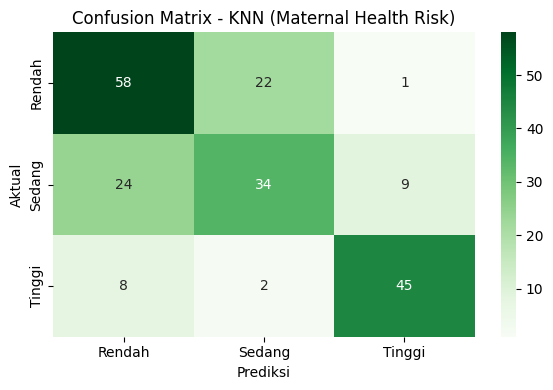

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Load Dataset ===
df = pd.read_csv('/content/Maternal.csv')

# === 2. Ubah nilai pada kolom 'RiskLevel' menjadi kategorikal (opsional: ubah ke Bahasa Indonesia) ===
df['RiskLevel'] = df['RiskLevel'].map({
    'low risk': 'Rendah',
    'mid risk': 'Sedang',
    'high risk': 'Tinggi'
})

# === 3. Pisahkan fitur dan label ===
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']

# === 4. Split data training dan testing ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# === 5. Normalisasi fitur ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === 6. Inisialisasi dan latih model KNN ===
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# === 7. Prediksi dan evaluasi ===
y_pred = knn.predict(X_test_scaled)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

# === 8. Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
cm_df = pd.DataFrame(cm, index=knn.classes_, columns=knn.classes_)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, cmap='Greens', fmt='d')
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - KNN (Maternal Health Risk)")
plt.tight_layout()
plt.show()


## **Evaluasi Data**

## **Evaluasi Perbandingan Model Klasifikasi pada Dataset Maternal Health Risk**

Tiga model klasifikasi telah diuji pada dataset **Maternal Health Risk** untuk memprediksi tingkat risiko kehamilan (`Rendah`, `Sedang`, `Tinggi`). Berikut adalah hasil akurasi dari masing-masing model berdasarkan hasil eksperimen Anda:

| Algoritma                    | Akurasi  |
| ---------------------------- | -------- |
| **Decision Tree**            | **0.84%** |
| **Gaussian Naive Bayes**     | **0.60%**     |
| **K-Nearest Neighbor (KNN)** | **0.67%**     |

### **Kesimpulan:**

* **Decision Tree** merupakan **model terbaik** untuk dataset ini dengan akurasi tertinggi sebesar **84%**. Model ini juga memberikan **visualisasi pohon keputusan** yang memudahkan interpretasi, sangat berguna dalam konteks medis.
* **KNN** menunjukkan performa moderat dengan akurasi **67%**, namun bisa ditingkatkan dengan tuning parameter seperti nilai `k`, pemilihan fitur, atau metode distance metric.
* **Gaussian Naive Bayes** menunjukkan akurasi paling rendah (**60%**) — kemungkinan besar karena **asumsi independensi antar fitur** dan **distribusi Gaussian** yang tidak terpenuhi dengan baik dalam dataset ini.